# Plotting segment matches

In [1]:
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ID = 4
VOTE_THRESHOLD = 4
USE_VOTE = False

scores = {}
lengths = {}

for i in range(2000, 4010, 10):
    scores[i] = []
    lengths[i] = []
    with open('../data/Pima_anzick_CK-13.out/Pima_anzick_CK-13.out.{}.txt'.format(i)) as f:   
        for line in f:
            if line.startswith('#'):
                continue
            line = line.rstrip().split('\t')
            
            if USE_VOTE:
                s = [int(j) if j != '.' else 0 for j in line[1:]]
                majority_vote = sum([t/abs(t) if t!=0 else 0 for t in s])      
                if majority_vote >= VOTE_THRESHOLD:
                    scores[i].append(1)
                elif majority_vote <= -VOTE_THRESHOLD:
                    scores[i].append(-1)

            else:
                s = line[ID]
                if s == '.':
                    continue
                else:
                    scores[i].append(int(s))
            leng = line[0][1:-1].split(', ')
            leng = int(leng[1]) - int(leng[0])
            lengths[i].append(leng)
#             scores[i].append(int(s))    

In [3]:
def boxplot(scores):
    anzick = []
    RM = []
    for k in scores:    
        anzick.append(len(filter(lambda x: x > 0, scores[k])))
        RM.append(len(filter(lambda x: x < 0, scores[k])))

    data = (anzick, RM)
    fig, ax1 = plt.subplots(figsize=(6, 6))
    ax1.set_axisbelow(True)
    # ax1.set_title('Comparison of Chr1 Tree Match Distribution (Pima, (Anzick, RM-83))', fontdict={'fontsize':14})
    ax1.set_xlabel('Sample Interquartile Range')
    ax1.set_ylabel('Segment Matches (Per MCMC Sample)')
    bp = plt.boxplot(data, 'o', positions=[0,0.5])
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    xtickNames = plt.setp(ax1, xticklabels=['Anzick', 'RM-83'])

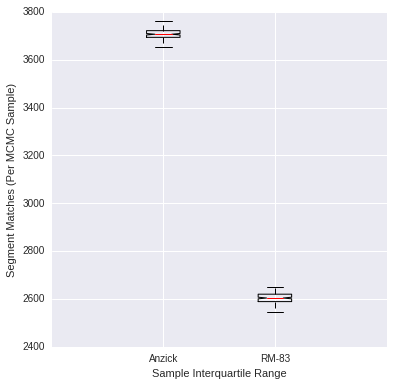

In [4]:
plt.clf()
boxplot(scores)
plt.show()

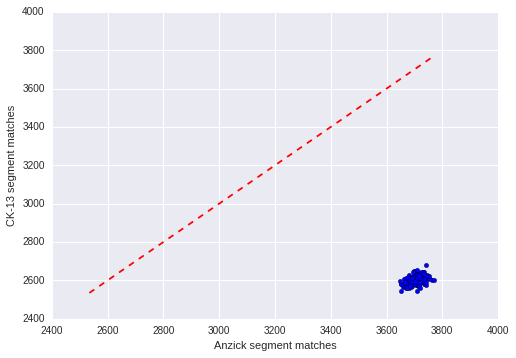

In [5]:
def lineplot(scores):
    anzick = []
    RM = []
    for k in scores:    
        anzick.append(len(filter(lambda x: x > 0, scores[k])))
        RM.append(len(filter(lambda x: x < 0, scores[k])))
    plt.scatter(anzick, RM)
    
    lower = min(min(anzick), min(RM)) - 10
    upper = max((max(anzick), max(RM))) + 10
    
    x = np.arange(lower, upper, 10)
    y = x    
    plt.plot(x,y, '--', color='red')
    plt.xlabel('Anzick segment matches')
    plt.ylabel('CK-13 segment matches')
#     plt.xlim(min(anzick)-100, max(anzick)+100)
#     plt.ylim(min(RM)-100, max(RM)+100)
    

plt.clf()
lineplot(scores)
plt.show()

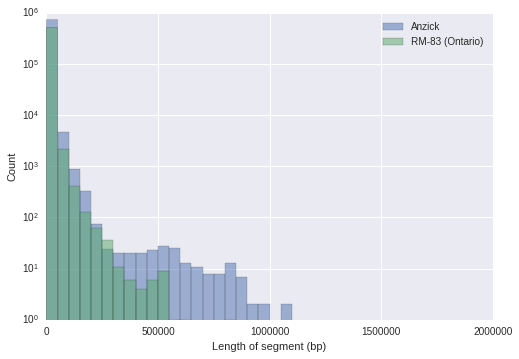

In [6]:
anzick = []
RM = []

anzick_lengths = []
RM_lengths = []

for k in scores:
    for l, s in zip(lengths[k], scores[k]):
        if s > 0:
            anzick_lengths.append(l)
        else:
            RM_lengths.append(l)  
    
    anzick.append(len(filter(lambda x: x > 0, scores[k])))
    RM.append(len(filter(lambda x: x < 0, scores[k])))

binwidth = 50000
maximum = max([max(anzick_lengths), max(RM_lengths)])
maximum = 2e6

plt.hist(anzick_lengths, bins=np.arange(0, maximum + binwidth, binwidth), alpha = 0.5, label='Anzick')
plt.hist(RM_lengths, bins=np.arange(0, maximum + binwidth, binwidth), alpha = 0.5, label='RM-83 (Ontario)')

plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('Length of segment (bp)')
plt.ylabel('Count')

plt.show()